In [18]:
import numpy as np # import numpy package for numerical python
import pandas as pd # import pandas

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#
from datetime import datetime # datetime module
import time # time module

#
from collections import Counter, OrderedDict
from operator import itemgetter   

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# FRADUELENT TRANSACTIONS

In [2]:
#Create Dataframe from CSV file & parse dates
data = pd.read_csv('Servicing - Product homework dataset.csv', parse_dates = True)

In [3]:
data.head()

,user_id,request_id,target_recipient_id,date_user_created,addr_country_code,addr_city,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,...,ccy_target,transfer_to_self,sending_bank_name,sending_bank_country,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date
0,77656618388e134648db01eecf7e79ee,2e9f911150e3a79e8d71a35779706e4c,992e0a729d6380d3b50aef5aa7c22572,27/01/2014 15:02,DEU,Berlin,GB,Personal,Direct Debit,26/08/2016 07:35,...,GBP,Other Recipient,Other/unknown,Other/unknown,gift,Desktop Web,55.0,0.0,27/01/2014 16:01,27/01/2014 16:17
1,a2497e0c763a7e5640fbf05e53fe0466,69cdf2f9ab2f59d10b636dc86bc9d7b7,02878ea857dbc90b2ed89b8f3488d501,12/10/2015 15:35,CAN,toronto,US,Personal,NaN,23/10/2016 22:54,...,USD,Other Recipient,Other/unknown,Other/unknown,expense,iOS App,1.0,NaN,23/10/2016 22:54,27/10/2016 16:45
2,759735d092819085c125a5cf81faf24b,5d7d30d709268f22f1a73ddbd6601690,927d3808cdc31d61226ae7c80bc8de16,04/10/2016 11:42,GBR,bolton,PT,Personal,Bank Transfer,26/10/2016 13:42,...,EUR,Self-recipient: Exact name match,NATIONAL WESTMINSTER BANK PLC,GB,blank,Android App,10.0,1.0,04/10/2016 12:27,04/10/2016 16:59
3,df9627db375322e65f4648ca72f4c630,0df2fc0a4a31595678cd1de3fad57e15,0411b7eb4c220a14876e77da8125f79b,17/10/2014 00:27,GBR,swindon,IN,Personal,Cards,28/01/2015 23:36,...,INR,Self-recipient: Email match,Other/unknown,Other/unknown,loan,Mobile Web,9.0,2.0,19/10/2014 22:00,24/11/2014 07:32
4,5672b2f16063ed75fbb304fee57c024b,7dcbf32659ae5ef61e10e5174a314d7d,dc248a1266709a71e45c40f33056bbb1,12/08/2015 07:45,FRA,paris,GB,Personal,Cards,18/08/2015 08:55,...,GBP,Other Recipient,LA BANQUE POSTALE,FR,blank,Desktop Web,1.0,NaN,18/08/2015 08:55,18/08/2015 09:44


In [4]:
# invoice analysis
def invoice_analysis(df):
    print(df['invoice_value'].min())
    print(df['invoice_value'].max())
    print(df['invoice_value'].median())
    print(df['invoice_value'].mean())

MODEL

- Risk Bands Defined


In [5]:
def invoice_risk(x,y):
    
    # 
    global test # declares the df global (outside function scope -->> df delcared in functiob wil be callable outside function)
    test = data[np.logical_and(data['transfer_sequence'] < x, data['invoice_value'] >= y)] # subsetting df
    
    # KEY DATA EXTRACTION
    test.drop(test.columns[[1,2,7,8,9,10,11,12,14,15,16,17,18,19,22,23,26,27]], axis=1, inplace=True)
    
    # Feature Engineering
    range = [10000,15000,20000,np.inf]
    risk_cats = ['LOW','MEDIUM','HIGH']
    test['RISK-LEVEL'] = pd.cut(test['invoice_value'],bins=range,labels=risk_cats)
    
    
    # VISUALIZATION ANALYSIS -->>
    # data points which will sit along the x axis 
    x1, y1 = [0,100000], [10000,10000] # # THRESHOLD metrics
    x2, y2 = [0,100000], [15000,15000] 
    x3, y3 = [0,100000], [20000,20000] 
    
    #
    plt.figure(figsize=[17,10])
    plt.grid(True)
    plt.scatter(x=test.index, y=test["invoice_value"], color = "green", alpha = 0.5)
    plt.plot(x1, y1,label='LOW-RISK', marker = 'o', color='yellow')
    plt.plot(x2, y2,label='MEDIUM-RISK', marker = 'o', color='orange')
    plt.plot(x3, y3,label='HIGH-RISK', marker = 'o', color='red')
    plt.legend(loc=2)
    
    #
    print("Potentail Number of Fraduelent Customers ",test.shape[0])
    

Potentail Number of Fraduelent Customers  1522


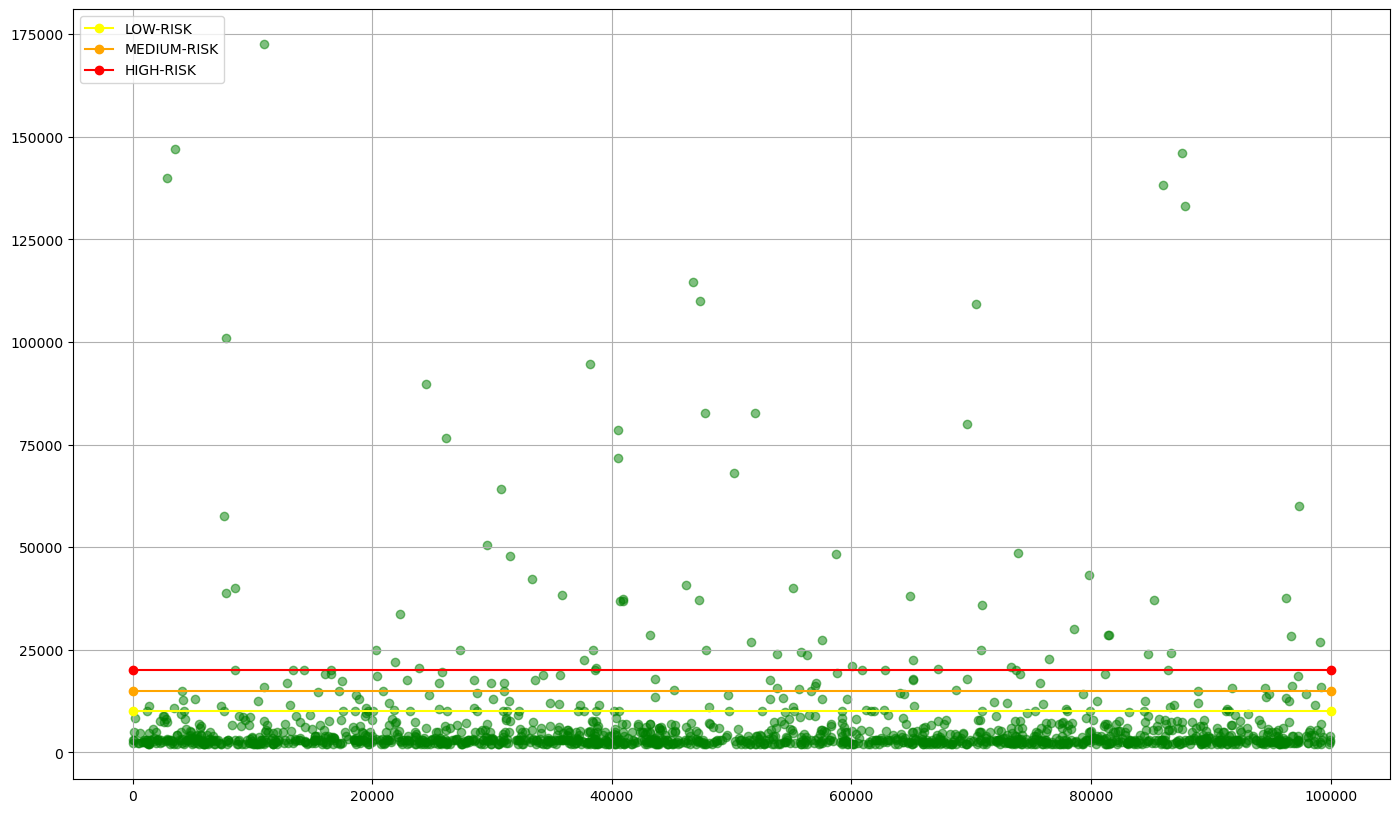

In [6]:
invoice_risk(2,2000)

In [7]:
test.head()

,user_id,date_user_created,addr_country_code,addr_city,recipient_country_code,invoice_value,sending_bank_name,sending_bank_country,transfer_sequence,days_since_previous_req,RISK-LEVEL
20,1eba3c7eed259aec1b9e44fff158f478,08/12/2014 10:49,DEU,Frankfurt am Main,IN,3121.112800,Other/unknown,Other/unknown,1.0,NaN,NaN
51,5c8c435fcead8f7683649b8c7e54dd90,06/04/2015 11:33,ESP,LA OROTAVA,GB,2211.915000,Other/unknown,Other/unknown,1.0,NaN,NaN
108,660973e9249c58aee79cd8c6785e8071,29/10/2016 09:16,NZL,Hamilton,GB,2938.115000,ASB BANK,NZ,1.0,NaN,NaN
118,d4cea8ebe8e05faadf5fcfc55ee9b5b3,19/08/2014 14:58,GBR,SURREY,NL,5000.000000,BARCLAYS BANK PLC,GB,1.0,NaN,NaN
145,de85abc46427454d82c4fcf724563b24,23/06/2016 14:11,USA,San Francisco,DK,8285.484633,SILICON VALLEY BANK,US,1.0,NaN,NaN


<Axes: xlabel='RISK-LEVEL', ylabel='count'>

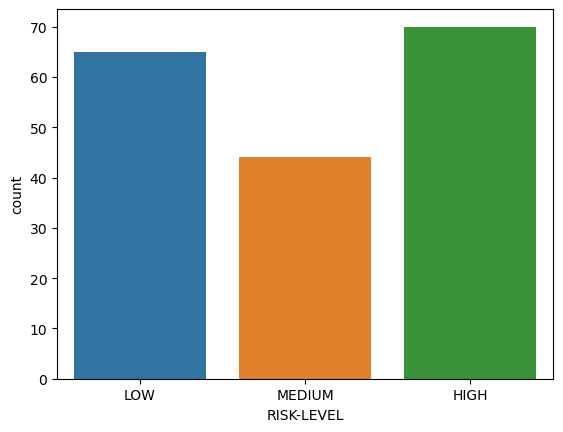

In [8]:
# visualy analyse countplot
sns.countplot(test, x="RISK-LEVEL")

# MODELING UPGRADED

# MODEL PROTOTYPE

In [24]:
# data structures to be employed in model for sepcific data collection
user, user_city, invoice_value, risk, ts = ([] for i in range(5)) # intiate -> empty lists

def prototype(x,y):
    
    # Model_fit_1
    global test # declares the df global (outside function scope -->> df delcared in functiob wil be callable outside function)
    test = data[np.logical_and(data['transfer_sequence'] < x, data['invoice_value'] >= y)] # subsetting df based on value parameters
    test.drop(test.columns[[1,2,7,8,9,10,11,12,14,15,16,17,18,19,22,23,26,27]], axis=1, inplace=True) # drop df columns
    
    # Feature Engineering - Bin numerical Data into categories
    range = [10000,15000,20000,np.inf]
    risk_cats = ['LOW','MEDIUM','HIGH']
    test['RISK-LEVEL'] = pd.cut(test['invoice_value'],bins=range,labels=risk_cats)
    
    # VISUALIZATION ANALYSIS -->>
    # visualy analyse countplot
    sns.countplot(test, x="RISK-LEVEL")
    print(test['RISK-LEVEL'].value_counts())
      
    # data points which will sit along the x axis 
    x1, y1 = [0,100000], [10000,10000] # Low risk
    x2, y2 = [0,100000], [15000,15000] # Medium risk
    x3, y3 = [0,100000], [20000,20000] # High risk
    
    #
    plt.figure(figsize=[17,10])
    plt.grid(True)
    plt.scatter(x=test.index, y=test["invoice_value"], color = "green", alpha = 0.5)
    plt.plot(x1, y1,label='LOW-RISK', marker = 'o', color='yellow')
    plt.plot(x2, y2,label='MEDIUM-RISK', marker = 'o', color='orange')
    plt.plot(x3, y3,label='HIGH-RISK', marker = 'o', color='red')
    plt.legend(loc=2)
    
    #
    # M_F_2
    for index,row in test.iterrows():
        if row['sending_bank_name'] == 'Other/unknown' and row['RISK-LEVEL'] == 'HIGH':
            # metadata (analysis timestamp)
            dt_request = datetime.now() # Getting the current date and time request executed/processes (time will be close to time server was hit for request)
            timestamp = datetime.timestamp(dt_request) # Getting the timestamp (time will be close to time server was hit for request)
            ts.append(dt_request)
            
            #print(row['user_id'],row['addr_city'],row['invoice_value'],row['RISK-LEVEL'])
            user.append(row['user_id'])
            user_city.append(row['addr_city'])
            invoice_value.append(row['invoice_value'])
            risk.append(row['RISK-LEVEL'])
            
    global detection # declares the df global
    detection = pd.DataFrame({'user': user, 'user_city': user_city, 'fund_transaction_attempt': invoice_value, 
                      'risk-level': risk,'timesamp-analysis-detection':ts})     
    #
    print("Potentail Number of Fraduelent Customers ",detection.shape[0])
    display(detection.head())
    display(detection.describe())
    display(detection.describe(include=object))
    

HIGH      70
LOW       65
MEDIUM    44
Name: RISK-LEVEL, dtype: int64
Potentail Number of Fraduelent Customers  40


,user,user_city,fund_transaction_attempt,risk-level,timesamp-analysis-detection
0,513f509623873272e96921429440876c,Aberdare,140000.0000,HIGH,2024-10-07 15:48:17.854314
1,138ac3b850426b28fca128587dc45e0b,Landenberg,147072.7009,HIGH,2024-10-07 15:48:17.854314
2,1ea671687981745b7ddb697df0e7acd8,Berlin,100870.0000,HIGH,2024-10-07 15:48:17.859294
3,f93c6b06973fcb6c973f776382a3a2fb,Lytham St.Annes,38800.0000,HIGH,2024-10-07 15:48:17.859294
4,76126050416dfe85837a45f4bb4526c4,Nice,21932.4900,HIGH,2024-10-07 15:48:17.869270


,fund_transaction_attempt
count,40.000000
mean,57982.233389
std,37442.826034
min,20574.036000
25%,32437.217500
50%,39400.000000
75%,77042.181610
max,147072.700900


,user,user_city,risk-level
count,40,40,40
unique,40,30,1
top,513f509623873272e96921429440876c,London,HIGH
freq,1,8,40


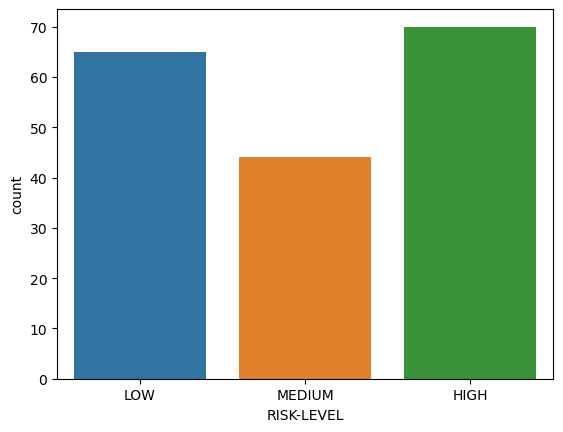

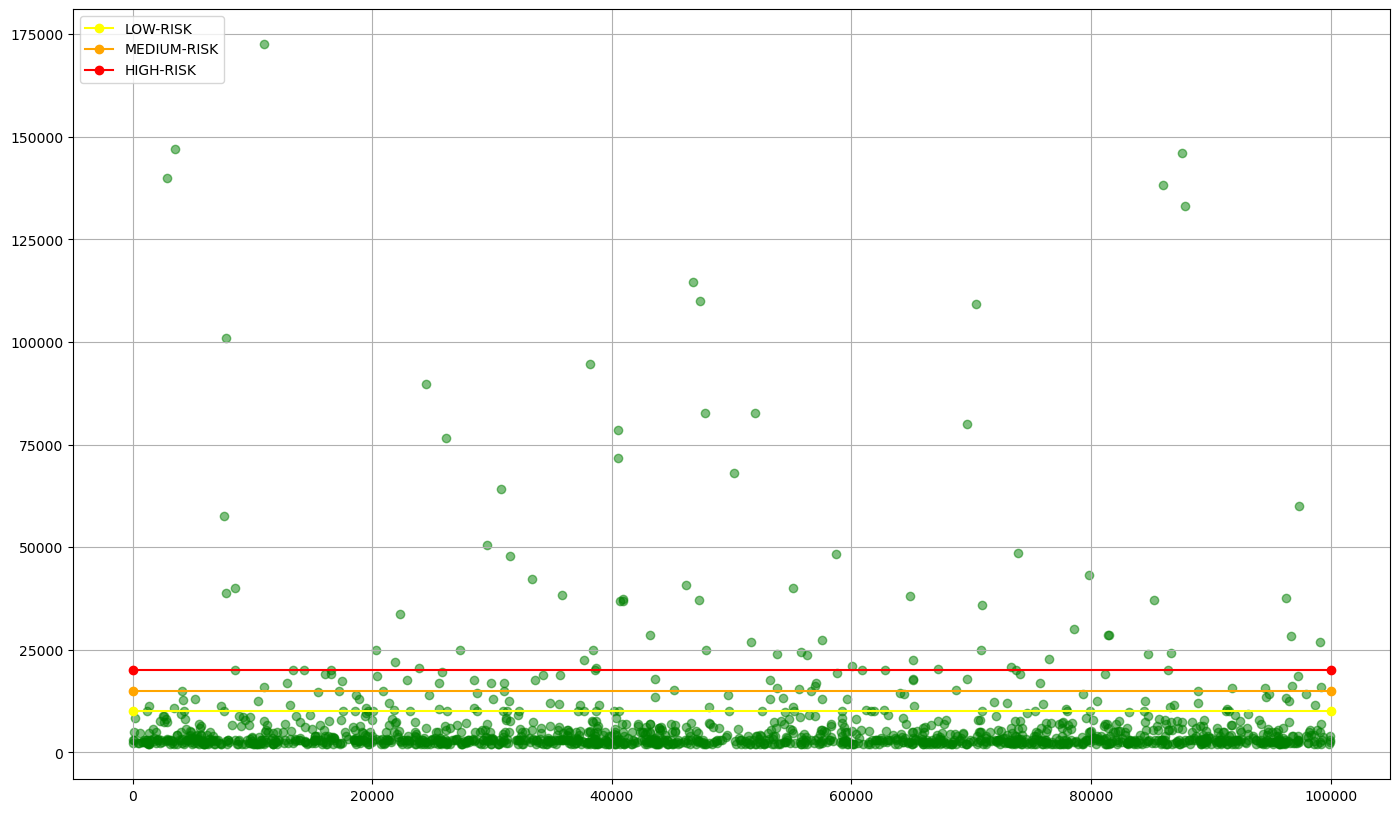

In [25]:
prototype(2,2000)

In [28]:
detection.to_excel(r'C:\Users\dwatters\Documents\Career\fraud_detection_model_records_identified.xlsx', index=False)

In [27]:
detection

,user,user_city,fund_transaction_attempt,risk-level,timesamp-analysis-detection
0,513f509623873272e96921429440876c,Aberdare,140000.00000,HIGH,2024-10-07 15:48:17.854314
1,138ac3b850426b28fca128587dc45e0b,Landenberg,147072.70090,HIGH,2024-10-07 15:48:17.854314
2,1ea671687981745b7ddb697df0e7acd8,Berlin,100870.00000,HIGH,2024-10-07 15:48:17.859294
3,f93c6b06973fcb6c973f776382a3a2fb,Lytham St.Annes,38800.00000,HIGH,2024-10-07 15:48:17.859294
4,76126050416dfe85837a45f4bb4526c4,Nice,21932.49000,HIGH,2024-10-07 15:48:17.869270
5,2cc50d9e435884e3c4ac092cd96c2802,london,33741.76000,HIGH,2024-10-07 15:48:17.870235
6,b3c1677e19deb7116168e9704c566d5c,Leeds,20574.03600,HIGH,2024-10-07 15:48:17.871263
7,d13525a6d4de657fd196de7b5f5743e8,London,89837.85000,HIGH,2024-10-07 15:48:17.872229
8,6251559170d388596ed578dbdc6c617c,London,76536.07500,HIGH,2024-10-07 15:48:17.874224
9,157f786e2424ac9ee32681d0c9e18540,london,50612.64000,HIGH,2024-10-07 15:48:17.877215
